# Tutorial on Machine Learning: Overview and Workflow
---


## Want to use Colab? [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/CU-Denver-MathStats-OER/CDHE-OER-Presentations/blob/master/Tutorials/Basics_of_ML_in_Python_Tutorial.ipynb)

---

---


***Disclaimer:*** 

- These tutorials are meant to convey high-level concepts and also show some advanced programming techniques and tricks. While some details are included for the sake of completeness or provide additional references for the interested reader, they are generally not required in order to follow the logical progression of ideas. 

- Moreover, you are not expected to know or understand all the details in great depth. In many cases, we specifically link details to specific courses so that you can plan your schedule around what you are most interested in learning.  

***Level of assumed pre-requisite knowledge:*** 

- A "pre-calculus" level of mathematical proficiency is assumed that covers some [geometry formulas for areas/volumes of common shapes](https://en.wikipedia.org/wiki/List_of_formulas_in_elementary_geometry), [college algebra](https://en.wikipedia.org/wiki/Elementary_algebra), and also some familiarity with [common trigonometric functions](https://en.wikipedia.org/wiki/Trigonometric_functions). 

- Basic statistics revolving around the concept of a [line of best fit](https://en.wikipedia.org/wiki/Simple_linear_regression), i.e., fitting a line through data.

- Introductory-level programming knowledge (in any language) involving variable types, user-defined functions, if-else statements, and for-loops. 

---

## ML, statistics, and optimization: The Big Picture
---

> Before machine learning, there was statistics...

<img src="https://miro.medium.com/max/828/1*x7P7gqjo8k2_bj2rTQWAfg.webp" width=50%>

- We briefly review [linear regression](https://en.wikipedia.org/wiki/Linear_regression) to help set the stage and mindset for learning models from data. 

    - Linear regression is a commonly studied topic in statistics and computational science. 

    - Linear regression concepts are also at the core of many ML algorithms, which makes it a great place to start our studies.

    - Moreover, the standard formulation of linear regression problems share many conceptual and quantitative features with ML algorithms in terms of "learning" some model parameters that help minimize some cost functional.


> At the foundation of both regression and ML is *optimization.* But, underneath that is the bedrock, which is made of *linear algebra* (e.g., MATH 3191: Applied Linear Algebra).

<br>

<img src="https://imgs.xkcd.com/comics/machine_learning.png">

## Want to study deeper?
---

- To go much more in-depth on linear regression, see Dr. Joshua French's OER textbook [A Progressive Introduction to Linear Models](https://cu-denver-mathstats-oer.github.io/Applied-Regression-Analysis/), which is developed for the MATH 4387/5387: Applied Regression Analysis course at CU Denver.

- Alternatively, watch some [videos](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) or read this [quick reference guide](http://www.dataschool.io/applying-and-interpreting-linear-regression/) to various key points.

- Want a gentler introduction that served as the main motivation for this notebook? Check out the [prologue lecture](https://github.com/CU-Denver-MathStats-OER/Programming-for-Data-Science/blob/main/Lectures-and-Assignments/06-Machine-Learning/lectures/06_lecture_prologue.ipynb) for module 06 in the MATH 1376: Programming for Data Science course for more details on regression and the [part a lecture](https://github.com/CU-Denver-MathStats-OER/Programming-for-Data-Science/blob/main/Lectures-and-Assignments/06-Machine-Learning/lectures/06_lecture_part_a.ipynb) for the same module that goes into deeper details on classifiers for ML.

- More advanced? Check out [scikit-learn](https://scikit-learn.org/stable/) examples that are available as Jupyter notebooks (but lack quite a bit of text). 

## Libraries
---

- [scikit-learn](http://scikit-learn.org/stable/) is a popular module that you can use to perform linear regression and machine learning. 

    - You could devote an entire course to this library (and still only scratch the surface of what it has to offer).

    - It is a good module for you to focus most of your energy/attention as you learn machine learning/data science since it provides a lot of the functionality for machine learning that you would in general need to use.

- [Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html) is a very impressive module that you may become intimately familiar with if you ever do any serious data analysis. The name is derived from the econometrics term [*panel data*](https://en.wikipedia.org/wiki/Panel_data#:~:text=In%20statistics%20and%20econometrics%2C%20panel,the%20same%20firms%20or%20individuals.) (sometimes referred to as longitudinal data by statisticians) that describes multi-dimensional data involving measurements over time. From the overview of pandas:

    > ...[provides] fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. [Pandas] aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

    - I highly recommend taking 3-5 minutes and just reading the full [overview of pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html).
   
-   Pandas has its own method for scraping specific types of data from HTML. 
    - Specifically, the method [`read_html`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html) will read HTML tables into a *list* of DataFrame objects whereas other `read_` commands exist for other more specialized purposes like [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) for reading csv files directly into a DataFrame.

    - There is a rather thorough [10 minute introductory tutorial](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) to pandas that I recommend going through. 

        - In fact, you can easily take that 10 minute tutorial and turn it into your own Jupyter notebook, which is a good activity that I highly recommend.*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [2]:
# read data into a DataFrame
url = 'https://github.com/CU-Denver-MathStats-OER/Programming-for-Data-Science/blob/main/Lectures-and-Assignments/06-Machine-Learning/lectures/Advertising.csv?raw=True'
data = pd.read_csv(url, index_col=0)

In [3]:
# print the shape of the DataFrame
data.shape

(200, 4)

In [4]:
data  # To get a "big picture" view of all data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [5]:
data.head()  # just the first 5 rows

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Some terminology
---

What are the **features**?

- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)

- Radio: advertising dollars spent on Radio

- Newspaper: advertising dollars spent on Newspaper

What is the **response**?

- Sales: sales of a single product in a given market (in thousands of widgets)

There are 200 **observations**, and thus 200 **markets** in the dataset.

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

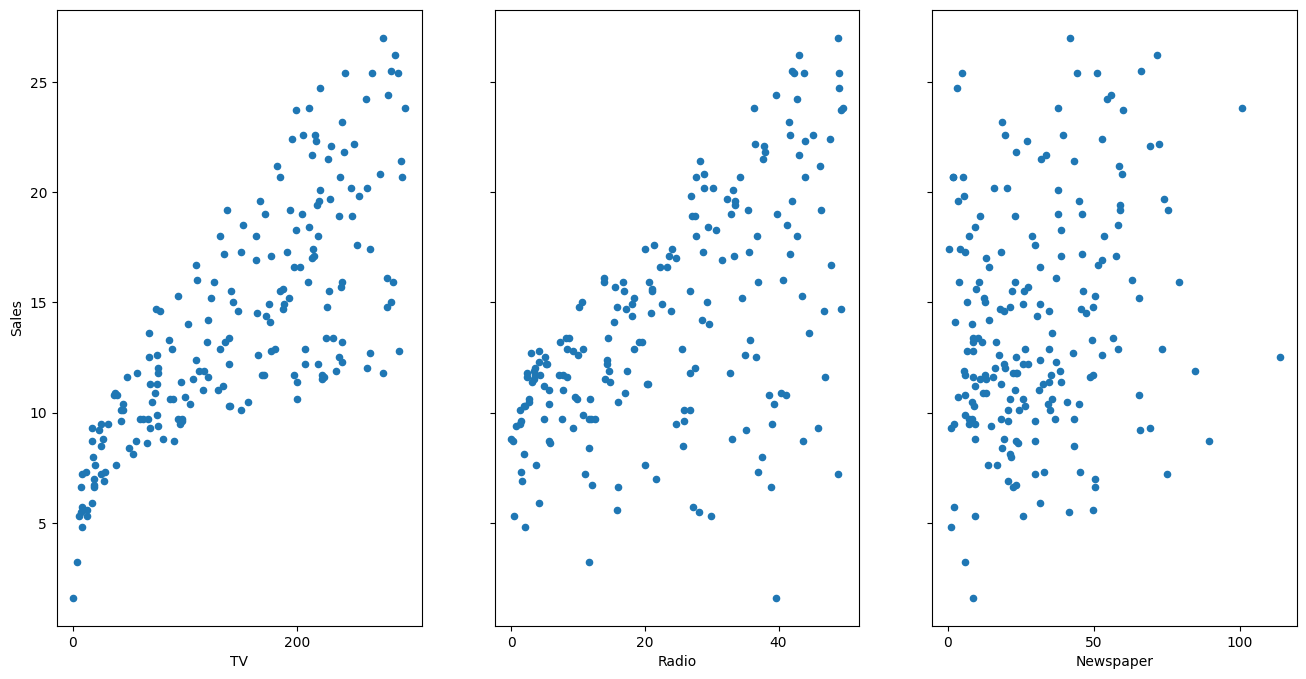

In [6]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
plt.rcParams.update({'font.size': 22})
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

## Questions About the Advertising Data
---

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future to maximize profit?

This general question might lead you to more specific questions:

1. Is there a relationship between ads and sales?

2. How strong is that relationship?

3. Which ad types contribute the most to sales?

4. What is the effect of each ad type of sales?

5. Given ad spending in a particular market, can sales be predicted?

Before we explore those, we may want to consider which scatter plot of data above even suggests there exists a clear functional relationship between a type of advertising expense and sales. The following cartoon contains a lot of wisdom.


<br>

<img src="https://www.explainxkcd.com/wiki/images/9/91/linear_regression.png">

<br>

## Simple Linear Regression
---

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x + \epsilon$

What does each term represent?

- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x
- $\epsilon$ is deviation of value from the average behavior

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict sales!

## Estimating ("Learning") Model Coefficients
---

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we find the line (mathematically) that minimizes the **sum of squared residuals** (or "sum of squared errors"):

<img src="https://github.com/CU-Denver-MathStats-OER/Programming-for-Data-Science/blob/main/Lectures-and-Assignments/06-Machine-Learning/lectures/06_estimating_coefficients.png?raw=1">



Let's break down the graphic.

- The black dots are the **observed values** of x and y.

- The blue line is our **least squares line**.

- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?

- $\beta_0$ is the **intercept** (the typical value of $y$ when $x$=0)

- $\beta_1$ is the **slope** (the typical change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

<img src="https://github.com/CU-Denver-MathStats-OER/Programming-for-Data-Science/blob/main/Lectures-and-Assignments/06-Machine-Learning/lectures/06_slope_intercept.png?raw=1">

Thus, in the $SS_\text{residuals}$ formula, the $\hat{y}_i$ predictions are obtained by evaluating the model (i.e., the function defining the line) at the known $x_i$. In other words, 

<br>

$$
\large \hat{y}_i = \beta_0+\beta_1x_i, 
$$

which implies

<br>

$$
\large    SS_\text{residuals} = \sum_{i=1}^N \left(\beta_0 + \beta_1x_i - y_i\right)^2.
$$

<br>

To ***learn*** the model coefficients simply means to solve the following optimization problem

<br>

$$
    \large \text{minimize}\ SS_\text{residuals}= \sum_{i=1}^N \left(\beta_0 + \beta_1x_i - y_i\right)^2.
$$

<br>

This is very similar to the problem of optimizing the jar shapes in the previous tutorial except now there are no constraints on $\beta_0$ and $\beta_1$. While there are two parameters in this problem, the "cost functional" ($SS_\text{residuals}$) is a quadratic function of $\beta_0$ and $\beta_1$, which means that if we visualize $SS_\text{residuals}$ as a function over the $(\beta_0,\beta_1)$ plane, we "see" something like shown in the code below.



In [7]:
def compute_SS_residuals(beta_0, beta_1, x, y):
    return np.sum(np.power(beta_0 + beta_1*x - y, 2))

In [8]:
# For illustrative purposes only
nplot = 25
true_beta_0 = 1
true_beta_1 = 2

r = np.linspace(0, 0.25, nplot)
theta = np.linspace(0, 2*np.pi, nplot)
r, theta = np.meshgrid(r, theta)
beta_0s = true_beta_0 + r*np.cos(theta)/2
beta_1s = true_beta_1 + r*np.sin(theta)

num_rand_pts = 10
x = -1 + 2*np.random.rand(num_rand_pts)
y = true_beta_0 + true_beta_1*x

SS_residuals = np.zeros((nplot, nplot))
for i in range(nplot):
    for j in range(nplot):
        SS_residuals[j, i] = compute_SS_residuals(beta_0s[j, i], beta_1s[j, i], 
                                                  x, y)

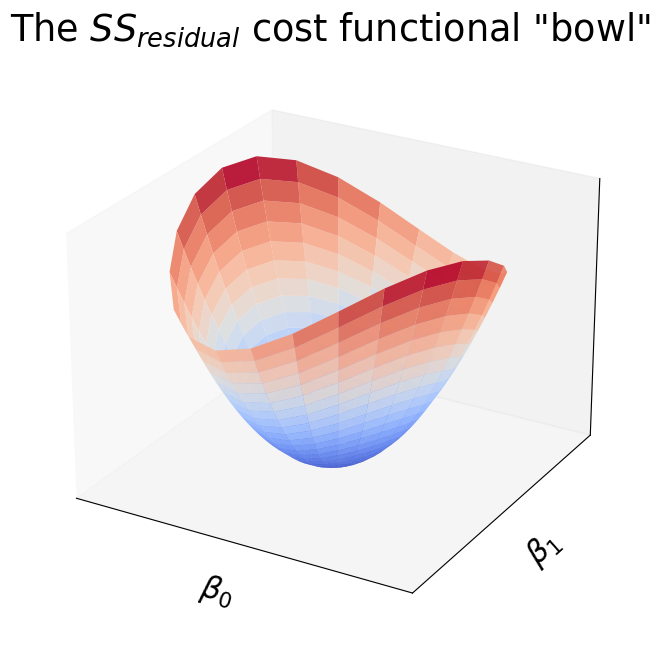

In [9]:
from matplotlib import cm

fig, ax = plt.subplots(figsize=(10,7), subplot_kw={"projection": "3d"})

surf = ax.plot_surface(beta_0s, beta_1s, SS_residuals, cmap=cm.coolwarm,
                       linewidth=0, alpha=0.9)

ax.view_init(elev=25)
ax.set_xlabel(r'$\beta_0$'), ax.set_ylabel(r'$\beta_1$')
ax.set_title('The $SS_{residual}$ cost functional "bowl"')
ax.set_xticks([]), ax.set_yticks([]), ax.set_zticks([])
fig.tight_layout()

- Clearly, there is a unique minimum to the "bowl" shape we see above.  

- The ***learning*** of $\beta_0$ and $\beta_1$ that is done is simply trying to estimate the values that position the $SS_\text{residual}$ value at the bottom of this bowl.


### A common workflow
---

We now estimate (i.e., learn) the model coefficients for sales as a function of TV advertising data using linear regression. 

Check out the code documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

The 3 steps we use below are so often repeated in ML libraries that they are worth remembering:

(1) ***import*** the model class from the ML library

(2) ***instantiate*** a model object based on this imported class

(3) ***fit*** (meaning learn) the parameters of the model using the available data

In [10]:
# create feature vector x and response vector y
feature_cols = ['TV']
x = data[feature_cols]
y = data.Sales

In [11]:
# follow the usual sklearn pattern: (1) import, (2) instantiate, (3) fit

# First we import
from sklearn.linear_model import LinearRegression

# Then, we instantiate a "linear regression" object
lm = LinearRegression()

# Finally, we call the fit method in the object to "learn" the linear relationship
lm.fit(x, y)

LinearRegression()

In [12]:
# print intercept and coefficients that were "learned" by the fit method and stored
# as data attributes within the object
print(lm.intercept_) 
print(lm.coef_)  # Shows up as an array because there are usually many features

7.032593549127695
[0.04753664]


## Interpreting Model Coefficients
---

How do we interpret the TV coefficient ($\beta_1$)?

- A "unit" increase in TV ad spending is **associated with** a 0.047537 "unit" increase in Sales.

- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Using the Model for Prediction
---

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?

$$\hat{y} = \beta_0 + \beta_1x$$
$$\hat{y} = 7.032594 + 0.047537 \times 50$$

In [13]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

In [14]:
# manually calculate the prediction in a slightly better way
lm.intercept_ + lm.coef_[0]*50

9.409425570778682

Thus, we would predict Sales of **9,409 widgets** in that market.

Of course, we could (and *should*) also use the linear model object to make the prediction! 

***In general, it is expecting that there are multiple features in the model (as we later see), so we need to formulate the input as either a 2-D array or as a DataFrame.***

I would delete the array example

In [15]:
import numpy as np

In [16]:
x_predict_array = np.array([[50]])  # Notice the double brackets

In [17]:
lm.predict(x_predict_array)

c:\Users\frencjos\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.40942557])

In [18]:
# This is probably the better way to do it since it aligns
# with the whole idea of using DataFrames to begin with.
x_predict_df = pd.DataFrame({'TV': [50]})
x_predict_df.head() # look at the "head" of the DataFrame

,TV
0,50


In [19]:
# use the model to make predictions on a new value
lm.predict(x_predict_df)

array([9.40942557])

## Plotting the Least Squares Line
---

Let's make predictions for the **smallest and largest observed values of x**, and then use the predicted values to plot the least squares line:

In [20]:
# create a DataFrame with the minimum and maximum values of TV
x_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
x_new.head()

,TV
0,0.7
1,296.4


In [21]:
# make predictions for those x values and store them
linear_preds = lm.predict(x_new)
linear_preds

array([ 7.0658692 , 21.12245377])

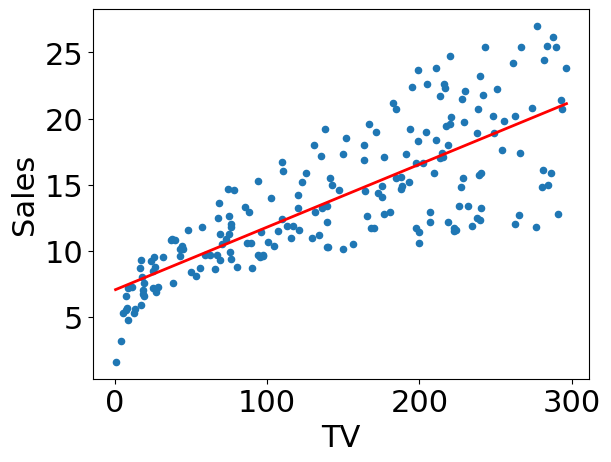

In [22]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(x_new, linear_preds, c='red', linewidth=2)

## How Well Does the Model Fit the data?
---

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. 

The R-squared value:

- Measures the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model
- Alternatively, measures the proportional reduction in $SS_{residuals}$ compared to the the **null model** that only has an intercept and no slope.
- Is between 0 and 1, and generally, higher is better because it means that more variance is explained by the model.

Here's an example of what R-squared "looks like":

<img src="https://github.com/CU-Denver-MathStats-OER/Programming-for-Data-Science/blob/main/Lectures-and-Assignments/06-Machine-Learning/lectures/06_r_squared.png?raw=1">

You can see that the **blue line** explains some of the variance in the data (R-squared=0.54), the **green line** explains more of the variance (R-squared=0.64), and the **red line** fits the training data even further (R-squared=0.66).

- Does the red line look overly complicated for the data we want to fit?


Let's calculate the R-squared value for our simple linear model using the score method:

In [23]:
# print the R-squared value for the model
lm.score(x, y)

0.611875050850071

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for **comparing different models**. This is a topic best studied in more depth in a course.

## Multiple Linear Regression
---

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n + \epsilon$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper + \epsilon$

We estimate these coefficients below.

In [24]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

lm_multiple = LinearRegression()  # Instantiate (no need to import again)
lm_multiple.fit(X, y)  # Fit

# print intercept and coefficients
print(lm_multiple.intercept_)
print(lm_multiple.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


How do we interpret these coefficients?

- For a given amount of Radio and Newspaper ad spending, an **increase of $1000 in TV ad spending** is associated with an **increase in Sales of 45.765 widgets**.
- This interprets the first coefficient. How would you interpret the other coefficients?

How well does our model fit?

In [25]:
# Compute the R-squared value for our the multiple linear regression model
lm_multiple.score(X, y)

0.8972106381789522

## Feature Selection
---

How should we decide **which features to include** in a linear model to balance simplicity with a goodness of fit?

**R-squared will always increase as you add more features to the model**, so it is not a reliable approach for choosing the best linear model.

An alternative to R-squared is the **adjusted R-squared**, $R^2_a$, which penalizes model complexity (to control for overfitting).

$$R^2_a=1-(1-R^2)\frac{\text{\# observations}-1}{\text{\# observations}-\text{\# of coefficients}}.$$

Let's define a function to compute $R^2_a$.

In [26]:
def compute_adj_Rsq(lm, X, y):
    R2 =  lm.score(X, y)
    nobs = len(X.axes[0])
    nfeatures = len(X.axes[1])
    return 1 - (1 - R2) * (nobs - 1)/(nobs - nfeatures)

Should we prefer the simple linear regression model or the multiple linear regression model for the TV data?

In [27]:
# simple linear regression model
compute_adj_Rsq(lm, x, y)

0.611875050850071

In [28]:
# multiple linear regression model
compute_adj_Rsq(lm_multiple, X, y)

0.896167091358434

In practice, feature selection is often performed by combining a measure of model fit (like $R^2_a$) with something called **cross-validation**, which provides a more reliable estimate of prediction error.

[**Cross-validation**](https://en.wikipedia.org/wiki/Cross-validation_(statistics)) breaks the data into $K$ non-overlapping parts and uses $K-1$ parts to fit a model and then compute the prediction error when you predict the $K$-th part. This is repeated for each of the $K$ parts. 

- Cross-validation is a better way to choose which of your models will best **generalize** to out-of-sample data. 
- This is a topic that is best investigated in depth in a more advanced course (e.g., MATH 4337/5337: Intro to Statistical and Machine Learning, MATH 4388/5388: Machine Learning Methods, or MATH 6388: Statistical and Machine Learning).

There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models. Cross-validation can be applied to any model,  not only linear models, so we can use it for machine learning models.

## Classifiers (artificial neurons): Concept and Connection to Linear Regression
---

The perceptron algorithm is a very simple version of a neural network or deep learning model, so it is a great place to start when entering the field of machine leaning.

From Wikipedia (emphasis my own):

> In machine learning, the perceptron is an algorithm for **supervised learning** of **binary classifiers**. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class. It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.

What does **supervised learning** mean? Simply put, it means we learn a function that maps inputs to outputs based on *training data* containing example input-output pairs. 

### The mathematics (not as bad as it looks)
---

Let $\mathbf{x}=(x_1,x_2,\ldots,x_m)$ denote the $m$ feature values present in the data and $\mathbf{w}=(w_1,w_2,\ldots, w_m)$ denote a collection of $m$ weights. The inner product of these two objects is $$\mathbf{w}\cdot\mathbf{x}=\sum_{i=1}^m w_ix_i,$$ i.e., it is the sum of the product of each pair $(x_i, w_i)$ over all observations.


 A linear binary classifier defined on $\mathbf{x}$ is represented as the function 

<br>

$$
\large    f(\mathbf{w}\cdot \mathbf{x} + b) = f\biggl(\sum_{i=1}^m w_i x_i + b\biggr) = \begin{cases}
                        1, & \sum_{i=1}^m w_i x_i + b>0, \\
                        -1, & \text{else}.
                    \end{cases}
$$
<br>

Here, $b$ denotes something called the bias. 

We can compute $\mathbf{w}\cdot\mathbf{x}=\sum_{i=1}^m w_ix_i$ using the `numpy.dot` function, which takes two arrays as arguments.


We use the perceptron to make binary decisions, i.e., whether or not data that possess $m$ identifying features should belong to one set or its complement (which are represented by the outputs 1 and -1, respectively). 

<br>

<img src="https://github.com/CU-Denver-MathStats-OER/Programming-for-Data-Science/blob/main/Lectures-and-Assignments/06-Machine-Learning/lectures/neuron_and_perceptron.png?raw=1" width=70%>

See commented text in this cell.
<!-- 
I would remove this completely. I don't think that this will even be on their radar during the presentation.

### A note about the *bias* in various source materials
---

As shown in the figure above (adapted from some of the [source material](https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch02/ch02.ipynb)), it is quite typical to refer to the bias as the weight $w_0$ and consider the weight vector as $(m+1)$-dimensional instead of $m$-dimensional. 

Keep this in mind when reviewing other sources. 

We will *not* follow that convention here because the formulas involving the learning of the bias are *different* than the formulas involved with learning the weights $w_1,w_2,\ldots, w_m$. By treating these separately, we avoid any conceptual (and mathematical) confusion regarding the bias term. -->

### What does a perceptron optimize?
---

A perceptron tries to minimizes our classification error. 

Ideally, we want our data set to be ***linearly separable***. If our data set is linearly separable, then we can create a perfect classifier.

What does linearly separable mean? It means that we can construct a line (for 2-dimensional input data sets), a plane (for 3-dimensional input data sets), or hyperplanes (for 4- and higher-dimensional input data sets) that *separates* the input data space into two parts associated with the output classes (i.e., the values of $y$). 

<br>

<img src="https://github.com/CU-Denver-MathStats-OER/Programming-for-Data-Science/blob/main/Lectures-and-Assignments/06-Machine-Learning/lectures/linearly_separable_example.png?raw=1" title='Linearly separable example' width=40%>

<br>

See the following for some more background and illustrative examples:

- https://en.wikipedia.org/wiki/Linear_separability

- https://www.commonlounge.com/discussion/6caf49570d9c4d0789afbc544b32cdbf

### Comparing regression and a perceptron
---

Similarities:

- Regression and a perceptron try to find the line that "best fits" the data, i.e. the line that minimizes our prediction or classification error.

Differences:

- The output of the regression function (the line of best fit) can be any number between $-\infty$ and $\infty$, depending on the input.
- The output of the perceptron can only be -1 or 1, depending on the input.

### Real data isn't linearly separable
---

John Hollinger is a former ESPN analyst/writer who developed some advanced statistics to quantify efficiencies of players and teams in the NBA. He created PER (Player Efficiency Rating), which is often used to evaluate how effective a player is. His statistics were so useful that he parlayed his creation into becoming the VP of basketball operations for the Memphis Grizzlies in 2012.

Below, we *crawl* through some online data courtesy of ESPN. By courtesy of ESPN what I actually mean is that according to the terms of service from Disney (the parent company of ESPN): 

> G. Informational and Entertainment Purposes. You understand that the Disney Products are for your personal, noncommercial use and are intended for informational and entertainment purposes only; the content available does not constitute legal, financial, professional, medical or healthcare advice or diagnosis and cannot be used for such purposes.

Anyway, let's see how well team efficiency statistics in the regular season correspond to a predictor of *success* defined by a team making the playoffs. 

In [29]:
# Let's first orient ourselves on the types of data sets we will be using
df_regular_season_temp = pd.read_html('http://www.espn.com/nba/hollinger/teamstats/_/year/2019')[0]

In [30]:
df_postseason_temp = pd.read_html('http://www.espn.com/nba/hollinger/teamstats/_/year/2019/seasontype/3')[0]

In [31]:
df_regular_season_temp

,0,1,2,3,4,5,6,7,8,9,10,11
0,Hollinger Stats - Offensive Efficiency,Hollinger Stats - Offensive Efficiency,Hollinger Stats - Offensive Efficiency,Hollinger Stats - Offensive Efficiency,Hollinger Stats - Offensive Efficiency,Hollinger Stats - Offensive Efficiency,Hollinger Stats - Offensive Efficiency,Hollinger Stats - Offensive Efficiency,Hollinger Stats - Offensive Efficiency,Hollinger Stats - Offensive Efficiency,Hollinger Stats - Offensive Efficiency,Hollinger Stats - Offensive Efficiency
1,RK,TEAM,PACE,AST,TO,ORR,DRR,REBR,EFF FG%,TS%,OFF EFF,DEF EFF
2,1,Golden State,103.2,20.7,12.6,22.5,77.1,51.0,56.5,59.6,113.9,106.5
3,2,Houston,100.4,16.0,12.0,22.8,74.4,48.1,54.2,58.1,112.5,107.9
4,3,Milwaukee,105.4,18.4,12.0,20.8,80.3,52.3,55.0,58.3,111.5,103.0
5,4,Portland,101.6,16.7,12.1,26.6,77.9,52.8,52.8,56.9,111.4,108.1
6,5,San Antonio,100.4,18.3,11.0,21.0,79.4,50.5,53.4,57.2,111.1,108.3
7,6,Toronto,102.5,18.4,12.4,21.9,77.1,50.2,54.3,57.9,110.9,104.3
8,7,Philadelphia,104.0,18.9,12.9,24.5,78.6,52.3,53.2,57.4,110.4,107.1
9,8,Boston,102.0,19.0,11.5,21.6,77.0,49.3,53.4,56.7,110.1,104.9


In [32]:
df_postseason_temp

,0,1,2,3,4,5,6,7,8,9,10,11
0,Hollinger Playoff Stats - Offensive Efficiency,Hollinger Playoff Stats - Offensive Efficiency,Hollinger Playoff Stats - Offensive Efficiency,Hollinger Playoff Stats - Offensive Efficiency,Hollinger Playoff Stats - Offensive Efficiency,Hollinger Playoff Stats - Offensive Efficiency,Hollinger Playoff Stats - Offensive Efficiency,Hollinger Playoff Stats - Offensive Efficiency,Hollinger Playoff Stats - Offensive Efficiency,Hollinger Playoff Stats - Offensive Efficiency,Hollinger Playoff Stats - Offensive Efficiency,Hollinger Playoff Stats - Offensive Efficiency
1,RK,TEAM,PACE,AST,TO,ORR,DRR,REBR,EFF FG%,TS%,OFF EFF,DEF EFF
2,1,Golden State,100.9,20.3,13.3,24.8,76.6,51.4,54.8,58.9,112.3,108.6
3,2,Denver,95.1,17.8,8.8,27.4,74.8,50.7,49.6,53.9,111.3,109.5
4,3,San Antonio,93.9,16.9,8.1,24.2,76.8,50.6,50.3,54.2,111.1,110.8
5,4,Milwaukee,102.2,18.0,11.4,21.7,83.0,53.5,52.3,56.0,109.0,100.2
6,5,Toronto,98.4,17.4,11.3,18.9,77.7,48.3,51.5,56.1,107.9,101.4
7,6,Houston,99.8,14.2,14.3,23.1,75.0,49.9,53.7,57.4,107.8,104.4
8,7,LA Clippers,105.6,17.8,12.8,21.9,74.5,46.6,51.1,56.3,107.3,119.3
9,8,Portland,98.8,14.7,11.3,24.4,72.4,48.3,50.1,54.1,106.7,109.7


In [33]:
Off_Eff = []
Def_Eff = []

y = []

iter = 0
for year in range(2009, 2020):
    url = 'http://www.espn.com/nba/hollinger/teamstats/_/year/' + str(year)
    df_regular_season = pd.read_html(url)[0]
    Off_Eff.append(df_regular_season.loc[2:, 10].values)
    Def_Eff.append(df_regular_season.loc[2:, 11].values)
    
    N = len(df_regular_season.loc[2:, 1].values)
    
    y.append(-np.ones(N))
    url += '/seasontype/3'
    df_playoffs = pd.read_html(url)[0]
    
    playoff_teams = df_playoffs.loc[2:,1].values
    all_teams = df_regular_season.loc[2:,1].values
    for i in range(16):
        for j in range(N):
            if playoff_teams[i] == all_teams[j]:
                y[iter][j] = 1
    iter += 1

In [34]:
Off_Eff_All = np.concatenate(Off_Eff).astype('float')
Def_Eff_All = np.concatenate(Def_Eff).astype('float')

bball_features = np.vstack((Off_Eff_All.flatten(), Def_Eff_All.flatten())).T

playoffs_All = np.concatenate(y)

In [35]:
idx_playoffs = np.where(playoffs_All==1)[0]
idx_no_playoffs = np.where(playoffs_All==-1)[0]

Text(0.5, 1.0, 'Playoff Teams (red) and Non-Playoff Teams (blue)')

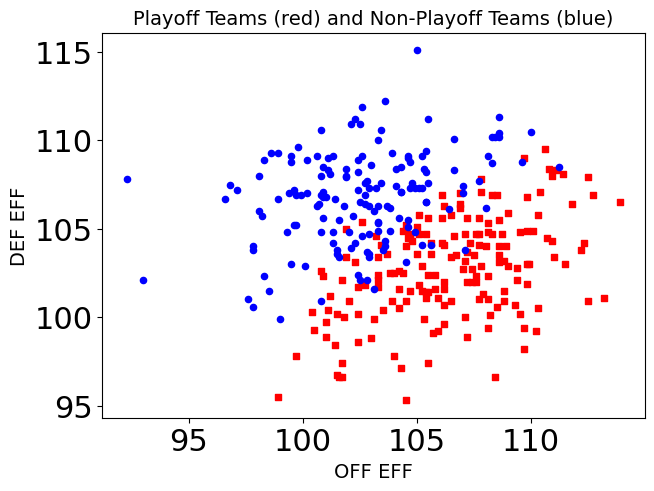

In [36]:
fig = plt.figure(figsize=(7,5))

plt.scatter(bball_features[idx_playoffs, 0], bball_features[idx_playoffs, 1], 
            s=20, c='r', marker='s')

plt.scatter(bball_features[idx_no_playoffs,0], bball_features[idx_no_playoffs, 1], 
            s=20, c='b', marker='o')

plt.xlabel('OFF EFF', fontsize=14)
plt.ylabel('DEF EFF', fontsize=14)

plt.title('Playoff Teams (red) and Non-Playoff Teams (blue)', fontsize=14)

### Okay, now what?

The dataset above sure *looks* like it is reasonably separated into two distinct classes although there is a *bit* of overlap. 

In other words, this dataset is ***not*** linearly separable, which will mean bad things for the convergence of the training algorithm for the perceptron. We can still *try* to train a perceptron on this data. It just may not work. (Okay, it is *guaranteed* to not work.)

However, we still need to address one key point: how do we *train* the perceptron?! In other words, how do we learn the weights and bias required to define the line that separates the *feature space* of offensive and defensive efficiency into playoff vs non-playoff teams?

### Let's try to train a perceptron on the basketball data that are *almost* linearly separable (meaning, not linearly separable)

- Well, convergence is *not* going to happen as there will always be miss-classification (which is just not acceptable for the perceptron).

- Below, we explore how the "line" we learn jumps around as we use more and more iterations in the learning.

In [37]:
# Step 1: Import
from sklearn.linear_model import Perceptron

# The "dirty secret" of needing to scale inputs
from sklearn.preprocessing import StandardScaler

# We can use a pipeline to setup an order of operations of objects
from sklearn.pipeline import make_pipeline

In [38]:
# Step 2: Instantiate
stupid_neuron = make_pipeline(StandardScaler(), 
                              Perceptron(max_iter=100, tol=None))

In [39]:
# Step 3: Fit
x = bball_features
y = playoffs_All

stupid_neuron.fit(x, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('perceptron', Perceptron(max_iter=100, tol=None))])

Text(0.5, 1.0, 'Perceptron')

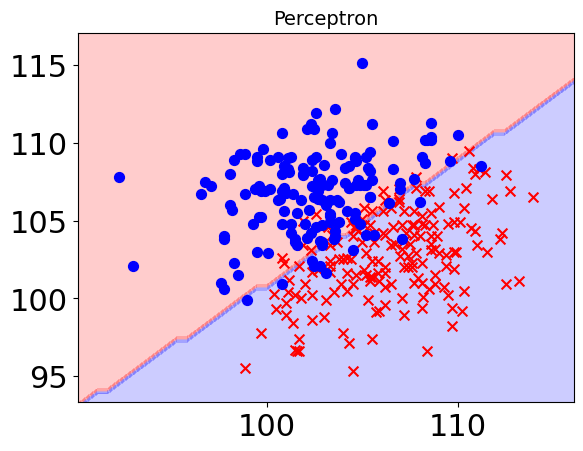

In [40]:
# Visualize performance

from matplotlib.colors import ListedColormap
 
x1_plot = np.linspace(np.min(x[:,0])-0.1*(np.max(x[:,0])-np.min(x[:,0])), 
                        np.max(x[:,0])+0.1*(np.max(x[:,0])-np.min(x[:,0])), 
                        51)
x2_plot = np.linspace(np.min(x[:,1])-0.1*(np.max(x[:,1])-np.min(x[:,1])), 
                        np.max(x[:,1])+0.1*(np.max(x[:,1])-np.min(x[:,1])), 
                        51)
x1_plot, x2_plot = np.meshgrid(x1_plot, x2_plot)

x_plot = np.vstack((x1_plot.flatten(), x2_plot.flatten())).T

y_plot = stupid_neuron.predict(x_plot)
y_plot = y_plot.reshape(x1_plot.shape)
plt.plot(figsize=(12,5))

colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.contourf(x1_plot, x2_plot, y_plot, alpha=0.2, cmap=cmap)

idx_1 = np.where(y==1)[0]
idx_0 = np.where(y==-1)[0]

plt.scatter(x[idx_1,0], x[idx_1,1], s=50, c='r', marker='x')
plt.scatter(x[idx_0,0], x[idx_0,1], s=50, c='b', marker='o')
plt.title('Perceptron', fontsize=14)

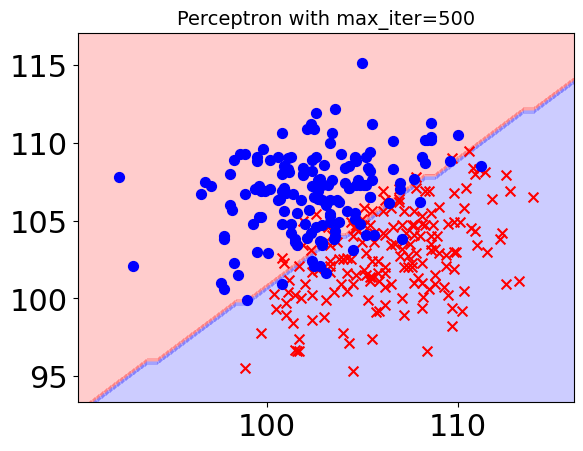

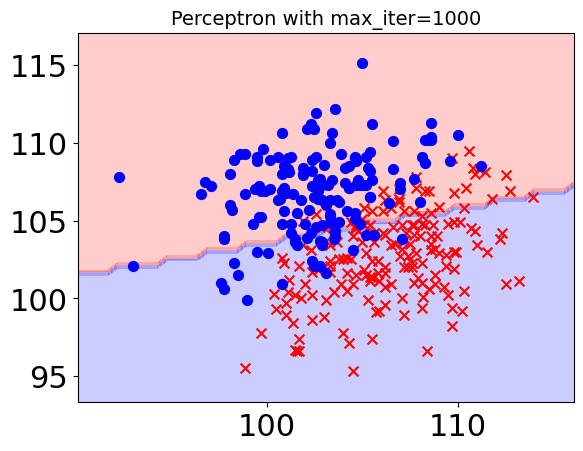

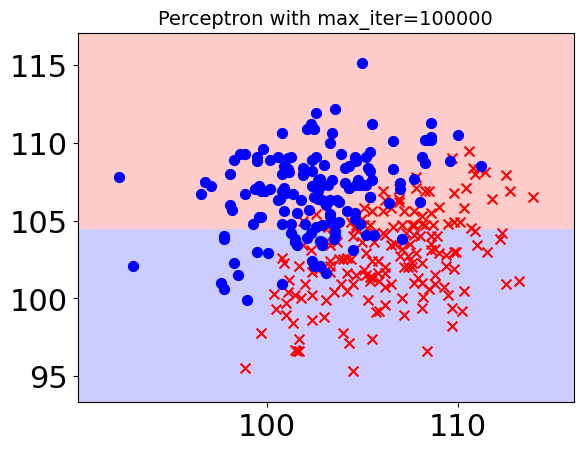

In [41]:
# Maybe the optimization procedure for fitting needing more iterations?
# Let's loop through different max iteration numbers

max_iters = [500, 1000, 100000]

neuron_list = []

for max_iter in max_iters:
    neuron_list.append(make_pipeline(StandardScaler(), 
                                     Perceptron(max_iter=max_iter, tol=None)))

for (neuron, max_iter) in zip(neuron_list, max_iters):
    neuron.fit(x, y)
    y_plot = neuron.predict(x_plot)
    y_plot = y_plot.reshape(x1_plot.shape)
    plt.figure()
    plt.plot(figsize=(12,5))

    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    plt.contourf(x1_plot, x2_plot, y_plot , alpha=0.2, cmap=cmap)

    idx_1 = np.where(y==1)[0]
    idx_0 = np.where(y==-1)[0]

    plt.scatter(x[idx_1,0], x[idx_1,1], s=50, c='r', marker='x')
    plt.scatter(x[idx_0,0], x[idx_0,1], s=50, c='b', marker='o')
    plt.title('Perceptron with max_iter={}'.format(max_iter), fontsize=14)

### Some closing remarks on the perceptron and foreshadowing
---

Linear separability is a ***strict requirement*** for the perceptron. 

The algorithms for learning the weights and bias in a perceptron will not work unless data are linearly separable. 

This is more than just mildly annoying, it is essentially impractical in many cases where we observe an ***almost*** linear separability.

<br>

<img src="https://github.com/CU-Denver-MathStats-OER/Programming-for-Data-Science/blob/main/Lectures-and-Assignments/06-Machine-Learning/lectures/almost_linearly_separable_example.png?raw=1" title='Almost separable' width=40%>

<br>

There is something called a ***kernel trick*** that is very common in machine learning. 

The basic premise is this: Maybe there is a function (called the kernel) that can transform the data in such a way that this transformed data are linearly separable. Then, we simply carry out our usual analysis except on this transformed data. 

When can we do this? Well, if it looks like there is a way to separate the data in some nonlinear way, then there is hope that we can figure out some kernel that allows us to linearly separate the transformed data. 

<br>

<img src="https://github.com/CU-Denver-MathStats-OER/Programming-for-Data-Science/blob/main/Lectures-and-Assignments/06-Machine-Learning/lectures/not_linearly_separable_example.png?raw=1" title='Nonlinearly separable illustration (what is the kernel trick?)' width=40%>

## [ADALINE = ADAptive LInear NEuron](https://en.wikipedia.org/wiki/ADALINE) <a name='adaline'>
---

<mark> ***Key points:*** <mark>


- When data are only *almost* linearly separable instead of absolutely linearly separable, we are going to have to live with some misclassifications (i.e., *predictions* given by $f(\mathbf{w}^\text{opt}\cdot\mathbf{x}^{(i)}+b^\text{opt})$  that do not equal the reality of $y^{(i)}$ for some subset of $1\leq i\leq N$). 

- This means that what is *optimal* will in general mean that we minimize the misclassification percent rather than simply make it zero. This idea is explored more in our next neuron model ADALINE, so just be patient for now.

- ADALINE is an alternative neuron model developed a few years after the perceptron was introduced. 

- Unlike the perceptron that learns the weights and bias based on the misclassification error being -2, 0, or 2 due to the use of a step-activation function acting on the *net input function* defined by $\mathbf{w}\cdot\mathbf{x} + b$, the activation function in ADALINE is the identity function, which means we simply use the errors defined by $y^{(i)} - \left(\mathbf{w}\cdot\mathbf{x}^{(i)} + b\right)$ to learn the weights and bias. 

- Once the weights and bias are learned, we still compute $f\left(\mathbf{w}\cdot\mathbf{x}+b\right)$ to classify any particular feature vector $\mathbf{x}$. The function $f$ from before is now considered a ***quantizer*** (as opposed to the activation function, which is now the identity function) that maps the net value into the class. 

We summarize this in the figure below. 

<img src="https://github.com/CU-Denver-MathStats-OER/Programming-for-Data-Science/blob/main/Lectures-and-Assignments/06-Machine-Learning/lectures/perceptron_vs_ADALINE.png?raw=1" width=50%>

<mark> ***Summary of main difference:*** </mark>

> While $y$ is just -1's and 1's, the output of $\left(\mathbf{w}\cdot\mathbf{x} + b\right)$ is *continuous*, so the *error* defined by $y^{(i)} - \left(\mathbf{w}\cdot\mathbf{x}^{(i)} + b\right)$ does not just take on discrete values but instead provides a number corresponding to *how much* we are right/wrong.

### How does this change the way in which we learn the weights?

We first write the **sum of square errors (SSE)** from the $N$ training data as the *cost function* (sometimes called an *objective* function)
$$
 \large   J(\mathbf{w},b) = \frac{1}{2}\sum_{i=1}^N \left[y^{(i)}-\left(\mathbf{w}\cdot\mathbf{x}^{(i)}+b\right)\right]^2. 
$$

Observe that $J(\mathbf{w},b)$ is a *quadratic* function over the space of weights and bias. The *objective* is to learn the weights and bias that *minimize* the *cost* function. This is conceptualized in the picture below.

<img src="https://github.com/CU-Denver-MathStats-OER/Programming-for-Data-Science/blob/main/Lectures-and-Assignments/06-Machine-Learning/lectures/cost-functional.png?raw=1" title="The cost function is like a big bowl" width=50%>

### There is a unique minimum?

***Correct!*** Since the cost function is a quadratic function, it has a unique global minimum even if the data are not linearly separable! (This is the part where you say "ooohhh".)

This means that you can always train an ADALINE...at least theoretically...

### Approximating the minimum with [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent)

First, a quick review of some useful facts from calculus and how we use them (you only need to understand how to apply these, so if you are not familiar with calculus, don't worry). 

- The [gradient](https://en.wikipedia.org/wiki/Gradient) of a scalar valued multivariate function evaluated at some input is a *vector* of derivatives (partial derivatives to be exact) that points in the direction of greatest increase of function values. This means that the *negative* of the gradient at some input will point in the direction of greatest *decrease* of function values.  

   - Why is this important to us? We want to minimize a function, so we will be using the *negative gradient*.

   - What do we need to be aware of? The *length* of the gradient vector (also called its magnitude) can complicate the decision making process in terms of how far we should step in the direction of the negative gradient.

       - If the length of the gradient vector is too large, then we may step *too far* so that we end up *increasing* the value of the function instead of *decreasing* the value! This is just plain counterproductive. 

       - If the length of the gradient is too small or we just choose to make too small of steps, then it may take *way too long* to have this method converge. 

The image below may prove useful to refer as it summarizes why we move in the direction of the negative gradient.

<img src="https://github.com/CU-Denver-MathStats-OER/Programming-for-Data-Science/blob/main/Lectures-and-Assignments/06-Machine-Learning/lectures/cost-functional-gradient.png?raw=1" title="The negative direction of gradient is what we want!" width="50%" />

In [42]:
# Step 1: Import the "stochastic gradient descent" (SGD) classifiers

from sklearn.linear_model import SGDClassifier as SGD

In [43]:
# Step 2: Instantiate
less_stupid_neuron = make_pipeline(StandardScaler(), 
                                   SGD(loss = 'squared_error', 
                                       penalty=None, tol=None, max_iter=10000))

In [44]:
# Step 3: Fit
less_stupid_neuron.fit(x, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier',
                 SGDClassifier(loss='squared_error', max_iter=10000,
                               penalty=None, tol=None))])

Text(0.5, 1.0, 'ADALINE')

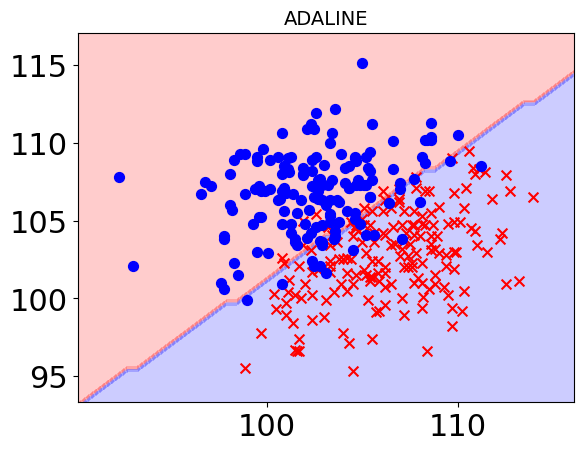

In [45]:
y_plot = less_stupid_neuron.predict(x_plot)
y_plot = y_plot.reshape(x1_plot.shape)
plt.plot(figsize=(12,5))

colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.contourf(x1_plot, x2_plot, y_plot, alpha=0.2, cmap=cmap)

idx_1 = np.where(y==1)[0]
idx_0 = np.where(y==-1)[0]

plt.scatter(x[idx_1,0], x[idx_1,1], s=50, c='r', marker='x')
plt.scatter(x[idx_0,0], x[idx_0,1], s=50, c='b', marker='o')
plt.title('ADALINE', fontsize=14)

In [46]:
df_regular_season_2023 = pd.read_html('http://www.espn.com/nba/hollinger/teamstats/_/year/2023')[0]

In [47]:
playoff_predictions = less_stupid_neuron.predict(df_regular_season_2023.loc[2:, [10, 11]].values.astype(float)).astype(str)
playoff_predictions[playoff_predictions=='-1.0'] = 'No'
playoff_predictions[playoff_predictions=='1.0'] = 'Yes'

In [48]:
df_temp = df_regular_season_2023.loc[2:, [1, 10, 11]]
df_temp.rename(columns={1: "Team", 10: "Off. Eff.", 11: "Def. Eff."}, inplace=True)
df_temp.reset_index(drop=True, inplace=True)
df_temp['Playoffs'] = playoff_predictions

In [52]:
def highlight_playoffs(s):  # Highlight the playoff teams
    if s.Playoffs == 'Yes':
        return ['background-color: blue']*4
    else:
        return ['background-color: black']*4


df_temp.style.apply(highlight_playoffs, axis=1)

,Team,Off. Eff.,Def. Eff.,Playoffs
0,Denver,115.7,111.7,Yes
1,Boston,115.7,109.1,Yes
2,Sacramento,115.3,112.3,Yes
3,Utah,114.3,113.3,No
4,Brooklyn,114.1,110.1,Yes
5,Portland,113.8,112.9,No
6,Philadelphia,113.6,108.8,Yes
7,Dallas,113.3,112.4,No
8,New York,112.9,111.1,Yes
9,Cleveland,112.6,107.6,Yes
